In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np

from timeit import default_timer as timer
from LoadData import LoadData
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import parallel_backend


TESTING = True
DECISION_TREE = False
SUPPORT_VECTOR = True
NEURAL_NET = False
K_NEAREST = False
BOOSTING = False
NORMALIZE_DATA = False
USE_PCA = True
DataSetName = "Fashion-MNIST"


In [2]:
cwd = pathlib.Path().absolute()
if DataSetName == "MNIST":
    training_data_path = "{}/mnist-train-data.csv".format(cwd)
    testing_data_path = "{}/mnist-test-data.csv".format(cwd)
else:
    training_data_path = "{}/fashion-mnist-train-data.csv".format(cwd)
    testing_data_path = "{}/fashion-mnist-test-data.csv".format(cwd)

with parallel_backend('threading'):
    training_labels, training_data, _ = LoadData(training_data_path, normalize=NORMALIZE_DATA)
    testing_labels, testing_data, _ = LoadData(testing_data_path, normalize=NORMALIZE_DATA)

Scaler = StandardScaler().fit(training_data)
        
training_data = Scaler.transform(training_data)
testing_data = Scaler.transform(testing_data)

Attempting to load: fashion-mnist-train-data.csv

Loading Complete
Data Statistics: 
   Number of Entries: 60000 
   Shape of Entry: (785,)

Attempting to load: fashion-mnist-test-data.csv

Loading Complete
Data Statistics: 
   Number of Entries: 10000 
   Shape of Entry: (785,)



In [3]:
"""
TRAINING TIME

"""

'\nTRAINING TIME\n\n'

In [4]:
solvers = ["Adam", "SGD"]

adam_runtime = [0.0]
adam_accuracy = [0.0]
classifier_list = []
sgd_runtime = [0.0]
sgd_accuracy = [0.0]

In [5]:
for solver in solvers:
    clf = MLPClassifier(solver=solver.lower(), max_iter=200, verbose=1, hidden_layer_sizes=(100,))
    for i in range(1, 11, 1):
        print("{} - Training Size: {}%".format(solver, (i * 10)))
        start_time = timer()
        with parallel_backend('threading'):
            clf.fit(training_data[:int((60000 * (0.1 * i))), :], training_labels[:int((60000 * (0.1 * i)))])
        end_time = timer()
        elapsed_time = end_time - start_time
        if i == 10:
            classifier_list.append(clf)
        print(elapsed_time)
        if solver == "SGD":
            sgd_accuracy.append(clf.score(testing_data, testing_labels))
            sgd_runtime.append(elapsed_time)
        else:
            adam_accuracy.append(clf.score(testing_data, testing_labels))
            adam_runtime.append(elapsed_time)

Adam - Training Size: 10%
Iteration 1, loss = 0.94039924
Iteration 2, loss = 0.48636252
Iteration 3, loss = 0.39617357
Iteration 4, loss = 0.34771279
Iteration 5, loss = 0.30954500
Iteration 6, loss = 0.28045704
Iteration 7, loss = 0.25365614
Iteration 8, loss = 0.22973912
Iteration 9, loss = 0.21145787
Iteration 10, loss = 0.19929433
Iteration 11, loss = 0.19010901
Iteration 12, loss = 0.17402643
Iteration 13, loss = 0.15727662
Iteration 14, loss = 0.14718997
Iteration 15, loss = 0.13515464
Iteration 16, loss = 0.12549216
Iteration 17, loss = 0.11700868
Iteration 18, loss = 0.10850945
Iteration 19, loss = 0.10335712
Iteration 20, loss = 0.10037282
Iteration 21, loss = 0.08728491
Iteration 22, loss = 0.08529068
Iteration 23, loss = 0.07710579
Iteration 24, loss = 0.06915218
Iteration 25, loss = 0.06657365
Iteration 26, loss = 0.06305856
Iteration 27, loss = 0.05999002
Iteration 28, loss = 0.05819029
Iteration 29, loss = 0.05404467
Iteration 30, loss = 0.04686618
Iteration 31, loss = 0.

Iteration 53, loss = 0.01016796
Iteration 54, loss = 0.01248765
Iteration 55, loss = 0.04010624
Iteration 56, loss = 0.01974556
Iteration 57, loss = 0.03055691
Iteration 58, loss = 0.02406151
Iteration 59, loss = 0.01185145
Iteration 60, loss = 0.00746108
Iteration 61, loss = 0.00658302
Iteration 62, loss = 0.00603014
Iteration 63, loss = 0.00607505
Iteration 64, loss = 0.00503064
Iteration 65, loss = 0.00473752
Iteration 66, loss = 0.00463013
Iteration 67, loss = 0.00487682
Iteration 68, loss = 0.00419064
Iteration 69, loss = 0.00437297
Iteration 70, loss = 0.00459486
Iteration 71, loss = 0.00358480
Iteration 72, loss = 0.00320350
Iteration 73, loss = 0.00316731
Iteration 74, loss = 0.00310142
Iteration 75, loss = 0.00311727
Iteration 76, loss = 0.00272718
Iteration 77, loss = 0.00304872
Iteration 78, loss = 0.00310596
Iteration 79, loss = 0.03754234
Iteration 80, loss = 0.15746391
Iteration 81, loss = 0.05422111
Iteration 82, loss = 0.01432979
Iteration 83, loss = 0.01634781
Iteratio

Iteration 98, loss = 0.00170973
Iteration 99, loss = 0.00163673
Iteration 100, loss = 0.00168876
Iteration 101, loss = 0.00174220
Iteration 102, loss = 0.00153840
Iteration 103, loss = 0.00144763
Iteration 104, loss = 0.02062240
Iteration 105, loss = 0.14504970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
58.16114519999999
Adam - Training Size: 60%
Iteration 1, loss = 0.55495578
Iteration 2, loss = 0.37087896
Iteration 3, loss = 0.32707010
Iteration 4, loss = 0.30024937
Iteration 5, loss = 0.27518893
Iteration 6, loss = 0.25753611
Iteration 7, loss = 0.23947158
Iteration 8, loss = 0.22354344
Iteration 9, loss = 0.20716594
Iteration 10, loss = 0.19665457
Iteration 11, loss = 0.18780368
Iteration 12, loss = 0.17718418
Iteration 13, loss = 0.16531554
Iteration 14, loss = 0.15463482
Iteration 15, loss = 0.14584105
Iteration 16, loss = 0.13794473
Iteration 17, loss = 0.13213904
Iteration 18, loss = 0.12756847
Iteration 19, loss = 0.11702196
Itera

Iteration 13, loss = 0.16479699
Iteration 14, loss = 0.15837881
Iteration 15, loss = 0.15076606
Iteration 16, loss = 0.14253741
Iteration 17, loss = 0.13841691
Iteration 18, loss = 0.13137303
Iteration 19, loss = 0.12578732
Iteration 20, loss = 0.12094136
Iteration 21, loss = 0.11290109
Iteration 22, loss = 0.11174452
Iteration 23, loss = 0.10381660
Iteration 24, loss = 0.09843863
Iteration 25, loss = 0.09951197
Iteration 26, loss = 0.08880576
Iteration 27, loss = 0.08864302
Iteration 28, loss = 0.08486461
Iteration 29, loss = 0.08159485
Iteration 30, loss = 0.07833103
Iteration 31, loss = 0.07723646
Iteration 32, loss = 0.07126193
Iteration 33, loss = 0.06576404
Iteration 34, loss = 0.06497767
Iteration 35, loss = 0.06284932
Iteration 36, loss = 0.06044854
Iteration 37, loss = 0.06307355
Iteration 38, loss = 0.05707691
Iteration 39, loss = 0.05391712
Iteration 40, loss = 0.05143851
Iteration 41, loss = 0.05761653
Iteration 42, loss = 0.05564079
Iteration 43, loss = 0.04660665
Iteratio

Iteration 80, loss = 0.02217085
Iteration 81, loss = 0.02859035
Iteration 82, loss = 0.02851969
Iteration 83, loss = 0.02436647
Iteration 84, loss = 0.01590702
Iteration 85, loss = 0.01577841
Iteration 86, loss = 0.03625283
Iteration 87, loss = 0.01741290
Iteration 88, loss = 0.01751305
Iteration 89, loss = 0.02408626
Iteration 90, loss = 0.02250823
Iteration 91, loss = 0.01435873
Iteration 92, loss = 0.01121374
Iteration 93, loss = 0.02481741
Iteration 94, loss = 0.03894030
Iteration 95, loss = 0.02132095
Iteration 96, loss = 0.01072225
Iteration 97, loss = 0.01061850
Iteration 98, loss = 0.01878637
Iteration 99, loss = 0.01593145
Iteration 100, loss = 0.01493650
Iteration 101, loss = 0.01830564
Iteration 102, loss = 0.02918356
Iteration 103, loss = 0.02185051
Iteration 104, loss = 0.01519306
Iteration 105, loss = 0.01512075
Iteration 106, loss = 0.01579887
Iteration 107, loss = 0.01846119
Iteration 108, loss = 0.01456082
Training loss did not improve more than tol=0.000100 for 10 con

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.51618560
Iteration 2, loss = 0.78107557
Iteration 3, loss = 0.67026628
Iteration 4, loss = 0.61189531
Iteration 5, loss = 0.57253683
Iteration 6, loss = 0.54400724
Iteration 7, loss = 0.52128601
Iteration 8, loss = 0.50323337
Iteration 9, loss = 0.48799547
Iteration 10, loss = 0.47503815
Iteration 11, loss = 0.46371545
Iteration 12, loss = 0.45327803
Iteration 13, loss = 0.44405783
Iteration 14, loss = 0.43547132
Iteration 15, loss = 0.42795314
Iteration 16, loss = 0.42069304
Iteration 17, loss = 0.41438335
Iteration 18, loss = 0.40836348
Iteration 19, loss = 0.40264252
Iteration 20, loss = 0.39682028
Iteration 21, loss = 0.39153936
Iteration 22, loss = 0.38686076
Iteration 23, loss = 0.38222250
Iteration 24, loss = 0.37791201
Iteration 25, loss = 0.37367934
Iteration 26, loss = 0.36887569
Iteration 27, loss = 0.36513449
Iteration 28, loss = 0.36197251
Iteration 29, loss = 0.35800513
Iteration 30, loss = 0.35453923
Iteration 31, loss = 0.35089954
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.26847252
Iteration 2, loss = 0.70167071
Iteration 3, loss = 0.60743089
Iteration 4, loss = 0.55669794
Iteration 5, loss = 0.52276412
Iteration 6, loss = 0.49788445
Iteration 7, loss = 0.47889165
Iteration 8, loss = 0.46359685
Iteration 9, loss = 0.45041942
Iteration 10, loss = 0.43932391
Iteration 11, loss = 0.42978767
Iteration 12, loss = 0.42130466
Iteration 13, loss = 0.41344452
Iteration 14, loss = 0.40635348
Iteration 15, loss = 0.40029661
Iteration 16, loss = 0.39420544
Iteration 17, loss = 0.38879984
Iteration 18, loss = 0.38327570
Iteration 19, loss = 0.37857871
Iteration 20, loss = 0.37391163
Iteration 21, loss = 0.36988210
Iteration 22, loss = 0.36587222
Iteration 23, loss = 0.36172370
Iteration 24, loss = 0.35796563
Iteration 25, loss = 0.35419159
Iteration 26, loss = 0.35089813
Iteration 27, loss = 0.34748074
Iteration 28, loss = 0.34450875
Iteration 29, loss = 0.34123874
Iteration 30, loss = 0.33872519
Iteration 31, loss = 0.33539358
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.12343502
Iteration 2, loss = 0.63996600
Iteration 3, loss = 0.56429345
Iteration 4, loss = 0.52186690
Iteration 5, loss = 0.49377055
Iteration 6, loss = 0.47265862
Iteration 7, loss = 0.45596527
Iteration 8, loss = 0.44259412
Iteration 9, loss = 0.43094502
Iteration 10, loss = 0.42116444
Iteration 11, loss = 0.41224600
Iteration 12, loss = 0.40441390
Iteration 13, loss = 0.39710834
Iteration 14, loss = 0.39057397
Iteration 15, loss = 0.38486376
Iteration 16, loss = 0.37912813
Iteration 17, loss = 0.37351164
Iteration 18, loss = 0.36885272
Iteration 19, loss = 0.36418632
Iteration 20, loss = 0.35983779
Iteration 21, loss = 0.35591859
Iteration 22, loss = 0.35167555
Iteration 23, loss = 0.34818971
Iteration 24, loss = 0.34453551
Iteration 25, loss = 0.34110626
Iteration 26, loss = 0.33768287
Iteration 27, loss = 0.33444484
Iteration 28, loss = 0.33177060
Iteration 29, loss = 0.32870068
Iteration 30, loss = 0.32565836
Iteration 31, loss = 0.32307932
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.03528922
Iteration 2, loss = 0.61789566
Iteration 3, loss = 0.54539895
Iteration 4, loss = 0.50489250
Iteration 5, loss = 0.47751118
Iteration 6, loss = 0.45696431
Iteration 7, loss = 0.44155309
Iteration 8, loss = 0.42864947
Iteration 9, loss = 0.41776700
Iteration 10, loss = 0.40821228
Iteration 11, loss = 0.39998920
Iteration 12, loss = 0.39243090
Iteration 13, loss = 0.38579431
Iteration 14, loss = 0.37946569
Iteration 15, loss = 0.37394470
Iteration 16, loss = 0.36841302
Iteration 17, loss = 0.36340663
Iteration 18, loss = 0.35908106
Iteration 19, loss = 0.35448610
Iteration 20, loss = 0.35057977
Iteration 21, loss = 0.34662731
Iteration 22, loss = 0.34264936
Iteration 23, loss = 0.33911799
Iteration 24, loss = 0.33566273
Iteration 25, loss = 0.33232312
Iteration 26, loss = 0.32934458
Iteration 27, loss = 0.32598897
Iteration 28, loss = 0.32314637
Iteration 29, loss = 0.32024252
Iteration 30, loss = 0.31739422
Iteration 31, loss = 0.31485910
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.96837653
Iteration 2, loss = 0.59142215
Iteration 3, loss = 0.52304564
Iteration 4, loss = 0.48564120
Iteration 5, loss = 0.46148271
Iteration 6, loss = 0.44265712
Iteration 7, loss = 0.42817278
Iteration 8, loss = 0.41602499
Iteration 9, loss = 0.40608145
Iteration 10, loss = 0.39734203
Iteration 11, loss = 0.38946199
Iteration 12, loss = 0.38244220
Iteration 13, loss = 0.37602336
Iteration 14, loss = 0.37036855
Iteration 15, loss = 0.36479082
Iteration 16, loss = 0.35980542
Iteration 17, loss = 0.35552061
Iteration 18, loss = 0.35084732
Iteration 19, loss = 0.34670616
Iteration 20, loss = 0.34294336
Iteration 21, loss = 0.33919401
Iteration 22, loss = 0.33576356
Iteration 23, loss = 0.33242291
Iteration 24, loss = 0.32908056
Iteration 25, loss = 0.32616738
Iteration 26, loss = 0.32289758
Iteration 27, loss = 0.31998832
Iteration 28, loss = 0.31734605
Iteration 29, loss = 0.31464937
Iteration 30, loss = 0.31210320
Iteration 31, loss = 0.30925863
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.91779799
Iteration 2, loss = 0.57830595
Iteration 3, loss = 0.51135287
Iteration 4, loss = 0.47490410
Iteration 5, loss = 0.45138374
Iteration 6, loss = 0.43423763
Iteration 7, loss = 0.42034457
Iteration 8, loss = 0.40953182
Iteration 9, loss = 0.39995246
Iteration 10, loss = 0.39172474
Iteration 11, loss = 0.38411305
Iteration 12, loss = 0.37757030
Iteration 13, loss = 0.37132973
Iteration 14, loss = 0.36578092
Iteration 15, loss = 0.36074525
Iteration 16, loss = 0.35599609
Iteration 17, loss = 0.35163352
Iteration 18, loss = 0.34730442
Iteration 19, loss = 0.34341029
Iteration 20, loss = 0.33955767
Iteration 21, loss = 0.33611365
Iteration 22, loss = 0.33255053
Iteration 23, loss = 0.32931781
Iteration 24, loss = 0.32634531
Iteration 25, loss = 0.32303499
Iteration 26, loss = 0.32017836
Iteration 27, loss = 0.31758324
Iteration 28, loss = 0.31468960
Iteration 29, loss = 0.31211584
Iteration 30, loss = 0.30961307
Iteration 31, loss = 0.30705203
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.92005926
Iteration 2, loss = 0.56998661
Iteration 3, loss = 0.50381386
Iteration 4, loss = 0.46916712
Iteration 5, loss = 0.44631013
Iteration 6, loss = 0.42950905
Iteration 7, loss = 0.41607430
Iteration 8, loss = 0.40463959
Iteration 9, loss = 0.39521351
Iteration 10, loss = 0.38688458
Iteration 11, loss = 0.37918273
Iteration 12, loss = 0.37237744
Iteration 13, loss = 0.36659190
Iteration 14, loss = 0.36083106
Iteration 15, loss = 0.35586282
Iteration 16, loss = 0.35071892
Iteration 17, loss = 0.34631651
Iteration 18, loss = 0.34222276
Iteration 19, loss = 0.33823146
Iteration 20, loss = 0.33434610
Iteration 21, loss = 0.33049596
Iteration 22, loss = 0.32745541
Iteration 23, loss = 0.32417887
Iteration 24, loss = 0.32113982
Iteration 25, loss = 0.31793343
Iteration 26, loss = 0.31496716
Iteration 27, loss = 0.31224663
Iteration 28, loss = 0.30925912
Iteration 29, loss = 0.30694757
Iteration 30, loss = 0.30435393
Iteration 31, loss = 0.30179342
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.86337085
Iteration 2, loss = 0.54075719
Iteration 3, loss = 0.48372761
Iteration 4, loss = 0.45274387
Iteration 5, loss = 0.43201869
Iteration 6, loss = 0.41628055
Iteration 7, loss = 0.40383976
Iteration 8, loss = 0.39370924
Iteration 9, loss = 0.38487887
Iteration 10, loss = 0.37695586
Iteration 11, loss = 0.37003210
Iteration 12, loss = 0.36369682
Iteration 13, loss = 0.35817197
Iteration 14, loss = 0.35282740
Iteration 15, loss = 0.34791841
Iteration 16, loss = 0.34336479
Iteration 17, loss = 0.33900646
Iteration 18, loss = 0.33535053
Iteration 19, loss = 0.33146423
Iteration 20, loss = 0.32769884
Iteration 21, loss = 0.32441289
Iteration 22, loss = 0.32118912
Iteration 23, loss = 0.31803845
Iteration 24, loss = 0.31509984
Iteration 25, loss = 0.31228600
Iteration 26, loss = 0.30948501
Iteration 27, loss = 0.30677013
Iteration 28, loss = 0.30425475
Iteration 29, loss = 0.30163665
Iteration 30, loss = 0.29952236
Iteration 31, loss = 0.29693228
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.88511174
Iteration 2, loss = 0.54246532
Iteration 3, loss = 0.48404271
Iteration 4, loss = 0.45262625
Iteration 5, loss = 0.43203950
Iteration 6, loss = 0.41665004
Iteration 7, loss = 0.40430486
Iteration 8, loss = 0.39374464
Iteration 9, loss = 0.38471385
Iteration 10, loss = 0.37722532
Iteration 11, loss = 0.37008198
Iteration 12, loss = 0.36387032
Iteration 13, loss = 0.35827516
Iteration 14, loss = 0.35284452
Iteration 15, loss = 0.34824770
Iteration 16, loss = 0.34344236
Iteration 17, loss = 0.33934664
Iteration 18, loss = 0.33525290
Iteration 19, loss = 0.33153632
Iteration 20, loss = 0.32802235
Iteration 21, loss = 0.32436214
Iteration 22, loss = 0.32141555
Iteration 23, loss = 0.31808092
Iteration 24, loss = 0.31518573
Iteration 25, loss = 0.31218270
Iteration 26, loss = 0.30962622
Iteration 27, loss = 0.30667676
Iteration 28, loss = 0.30413224
Iteration 29, loss = 0.30156893
Iteration 30, loss = 0.29924479
Iteration 31, loss = 0.29672698
Iteration 32, los

C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
adam_accuracy = np.asarray(adam_accuracy)
adam_runtime = np.asarray(adam_runtime)
sgd_accuracy = np.asarray(sgd_accuracy)
sgd_runtime = np.asarray(sgd_runtime)

In [7]:
adam_accuracy.tofile('adam_accuracy_{}.csv'.format(DataSetName),sep=',',format='%.3f')
adam_runtime.tofile('adam_runtime_{}.csv'.format(DataSetName),sep=',',format='%.3f')
sgd_accuracy.tofile('sgd_accuracy_{}.csv'.format(DataSetName),sep=',',format='%.3f')
sgd_runtime.tofile('sgd_runtime_{}.csv'.format(DataSetName),sep=',',format='%.3f')

In [8]:
"""
Results

"""

'\nResults\n\n'

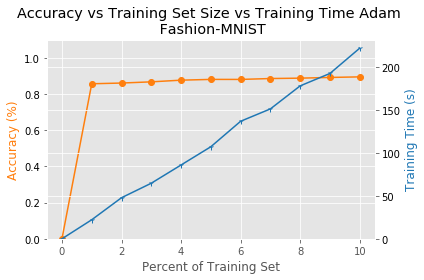

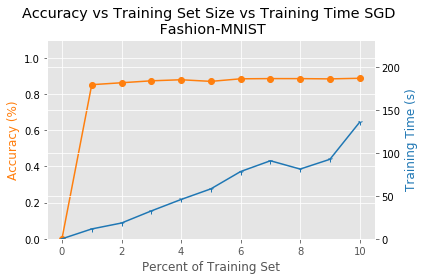

In [12]:
colors = ["tab:orange", "tab:blue", "tab:green", "tab:red"]

run = [sgd_runtime, adam_runtime]
acc = [sgd_accuracy, adam_accuracy]

for solver in range(len(solvers)):
    with plt.style.context('ggplot'):
        fig0, ax0 = plt.subplots()
        ax0.set_xlabel("Percent of Training Set")
        ax0.set_ylabel("Accuracy (%)", color='tab:orange')
        ax0.set_title("Accuracy vs Training Set Size vs Training Time {} \n {}".format(solvers[solver], DataSetName))
        ax0.tick_params(axis='y', labelcolor="black")
        ax0.set_ylim(0, 1.1)
        ax3 = ax0.twinx()
        ax3.set_ylabel("Training Time (s)", color="tab:blue")
        ax3.set_ylim(0, max(max(adam_runtime), max(sgd_runtime)) + 10)
        ax3.tick_params(axis='y', labelcolor="black")
        for i in range(1):        
            ax0.plot([i for i in range(11)], acc[solver], colors[i], marker='o', label=solvers[solver])
            ax3.plot([i for i in range(11)], run[solver], colors[i+1], marker="1", label="{} training-time".format(solvers[solver]))
        fig0.tight_layout()
        directory = "{}/Training_{}_{}_Set_Size_Impact_vs_Training_Time.png".format(cwd, solvers[solver], DataSetName)
        plt.savefig(directory)
#         plt.close("all")

In [23]:
for i in range(len(classifier_list)):
    temp = np.asarray(classifier_list[i].loss_curve_)
    temp.tofile('{}_Loss_Curve_{}.csv'.format(solvers[i], DataSetName),sep=',',format='%.3f')

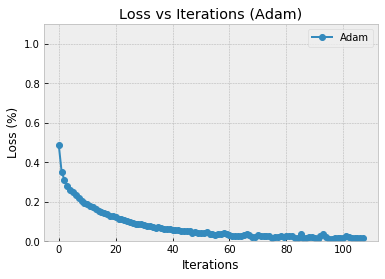

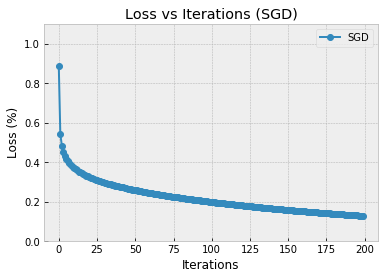

In [19]:
count = 0
for net in classifier_list:
    with plt.style.context('bmh'):
        fig, ax = plt.subplots()
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Loss (%)")
        ax.set_title("Loss vs Iterations ({})".format(solvers[count]))
        ax.set_ylim(0, 1.1)

        ax.plot([i for i in range(len(net.loss_curve_))], net.loss_curve_, marker='o',
                label=solvers[count])
        ax.legend()
        plt.savefig("{}/{}_{}_Training_Size_Impact.png"
                    .format(cwd, solvers[count], DataSetName))
        count += 1
